# KNN Classification

## ASL Dataset

In [33]:
import pandas as pd
import numpy as np

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.preprocessing import minmax_scale
from sklearn.neighbors import KNeighborsClassifier

asl_train = pd.read_csv('sign_mnist_train.csv')
asl_test = pd.read_csv('sign_mnist_test.csv')
asl_combined = pd.concat([asl_train, asl_test], axis=0).reset_index(drop=True)


In [35]:
asl_targets_combined = asl_combined.pop('label').values
asl_data_combined = asl_combined.values

asl_data_train, asl_data_test, asl_targets_train, asl_targets_test = train_test_split(
    asl_data_combined, asl_targets_combined, test_size=0.2, random_state=42
)
asl_data_train_scaled = minmax_scale(asl_data_train)
asl_data_test_scaled = minmax_scale(asl_data_test)


In [36]:
knn_classifier = KNeighborsClassifier(n_neighbors=5, p=2)
knn_classifier.fit(asl_data_train_scaled, asl_targets_train)

asl_y_pred = knn_classifier.predict(asl_data_test_scaled)

In [37]:
print("Accuracy: " + str(round(accuracy_score(asl_targets_test, asl_y_pred), 4)))
p, r, f, s = precision_recall_fscore_support(asl_targets_test, asl_y_pred, average='macro')
print("Precision: ", round(p, 4))
print("Recall: ", round(r, 4))
print("F1-Score: ", round(f, 4))

Accuracy: 0.9964
Precision:  0.9965
Recall:  0.9964
F1-Score:  0.9964


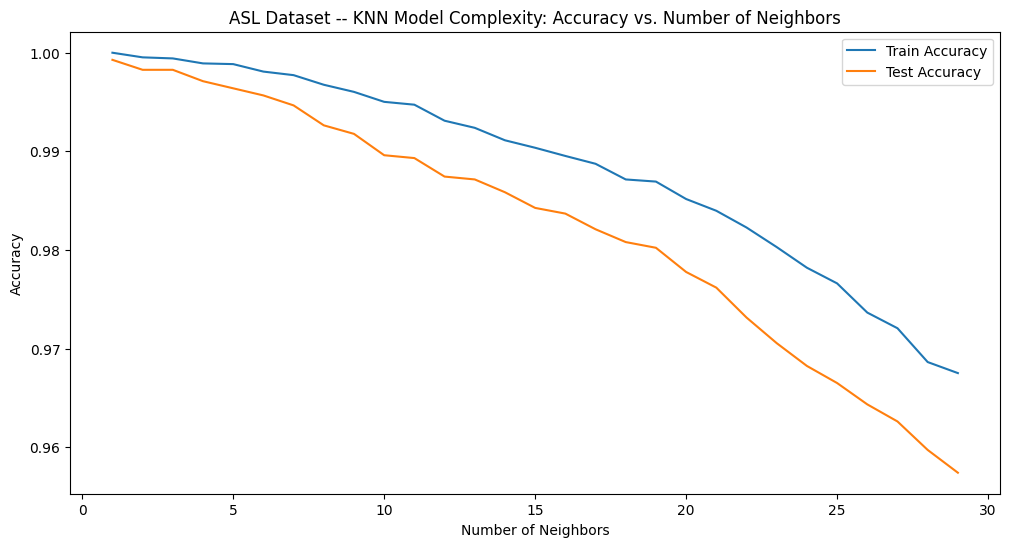

In [39]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

neighbors = range(1, 30)
asl_train_accuracy = []
asl_test_accuracy = []

for n in neighbors:
    knn_complexity = KNeighborsClassifier(n_neighbors=n)
    knn_complexity.fit(asl_data_train_scaled, asl_targets_train)
    asl_train_accuracy.append(knn_complexity.score(asl_data_train_scaled, asl_targets_train))
    asl_test_accuracy.append(knn_complexity.score(asl_data_test_scaled, asl_targets_test))

plt.figure(figsize=(12, 6))
plt.plot(neighbors, asl_train_accuracy, label='Train Accuracy')
plt.plot(neighbors, asl_test_accuracy, label='Test Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('ASL Dataset -- KNN Model Complexity: Accuracy vs. Number of Neighbors')
plt.legend()
plt.show()


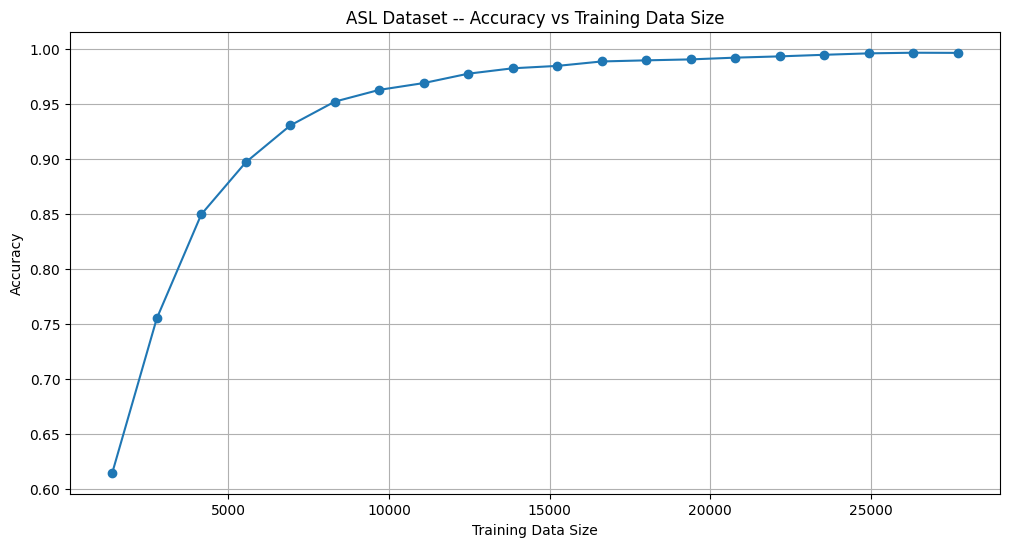

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def calculate_asl_accuracy_vs_datasize(asl_data_train_scaled, asl_targets_train, asl_data_test_scaled, asl_targets_test, step_size=0.05):
    asl_accuracies = []
    asl_training_sizes = []

    for size in np.arange(step_size, 1 + step_size, step_size):
        subset_size = int(size * len(asl_data_train_scaled))
        asl_training_sizes.append(subset_size)
        subset_data = asl_data_train_scaled[:subset_size]
        subset_targets = asl_targets_train[:subset_size]
        knn_classifier = KNeighborsClassifier(n_neighbors=5, p=2)
        knn_classifier.fit(subset_data, subset_targets)
        asl_y_pred = knn_classifier.predict(asl_data_test_scaled)
        accuracy = accuracy_score(asl_targets_test, asl_y_pred)
        asl_accuracies.append(accuracy)

    return asl_training_sizes, asl_accuracies

asl_training_sizes, asl_accuracies = calculate_asl_accuracy_vs_datasize(
    asl_data_train_scaled, asl_targets_train, asl_data_test_scaled, asl_targets_test
)

plt.figure(figsize=(12, 6))
plt.plot(asl_training_sizes, asl_accuracies, marker='o')
plt.title('ASL Dataset -- Accuracy vs Training Data Size')
plt.xlabel('Training Data Size')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


Class 0 - Precision: 0.9934640522875817, Recall: 1.0
Class 1 - Precision: 0.9898648648648649, Recall: 1.0
Class 2 - Precision: 0.9970059880239521, Recall: 1.0
Class 3 - Precision: 1.0, Recall: 1.0
Class 4 - Precision: 0.9929824561403509, Recall: 0.9929824561403509
Class 5 - Precision: 1.0, Recall: 1.0
Class 6 - Precision: 0.99644128113879, Recall: 1.0
Class 7 - Precision: 1.0, Recall: 0.9965635738831615
Class 8 - Precision: 1.0, Recall: 0.9927272727272727
Class 10 - Precision: 1.0, Recall: 0.9873817034700315
Class 11 - Precision: 1.0, Recall: 0.9965986394557823
Class 12 - Precision: 0.9929078014184397, Recall: 0.9929078014184397
Class 13 - Precision: 1.0, Recall: 0.996415770609319
Class 14 - Precision: 1.0, Recall: 0.9963503649635036
Class 15 - Precision: 1.0, Recall: 1.0
Class 16 - Precision: 1.0, Recall: 1.0
Class 17 - Precision: 0.9966329966329966, Recall: 0.9966329966329966
Class 18 - Precision: 0.9969040247678018, Recall: 1.0
Class 19 - Precision: 0.9964912280701754, Recall: 1.0
C

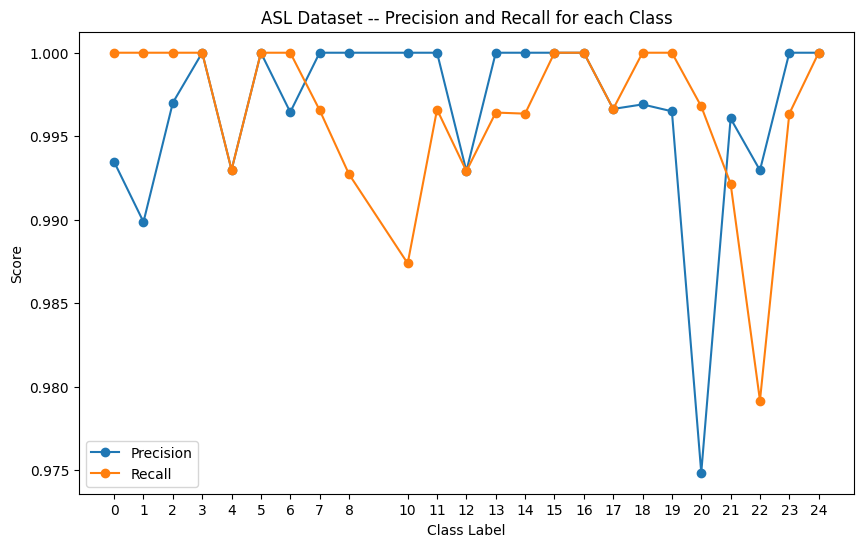

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def asl_precision_recall_per_class(asl_y_true, asl_y_pred, class_label):
    asl_y_true_binary = (asl_y_true == class_label).astype(int)
    asl_y_pred_binary = (asl_y_pred == class_label).astype(int)

    tp = np.sum((asl_y_true_binary == 1) & (asl_y_pred_binary == 1))
    fp = np.sum((asl_y_true_binary == 0) & (asl_y_pred_binary == 1))
    fn = np.sum((asl_y_true_binary == 1) & (asl_y_pred_binary == 0))
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0

    return precision, recall

asl_unique_classes = np.unique(asl_targets_test)
asl_precisions = []
asl_recalls = []

for class_label in asl_unique_classes:
    precision, recall = asl_precision_recall_per_class(asl_targets_test, asl_y_pred, class_label)
    asl_precisions.append(precision)
    asl_recalls.append(recall)
    print(f"Class {class_label} - Precision: {precision}, Recall: {recall}")

plt.figure(figsize=(10, 6))
plt.plot(asl_unique_classes, asl_precisions, label='Precision', marker='o')
plt.plot(asl_unique_classes, asl_recalls, label='Recall', marker='o')
plt.xticks(asl_unique_classes) 
plt.xlabel('Class Label')
plt.ylabel('Score')
plt.title('ASL Dataset -- Precision and Recall for each Class')
plt.legend()
plt.show()


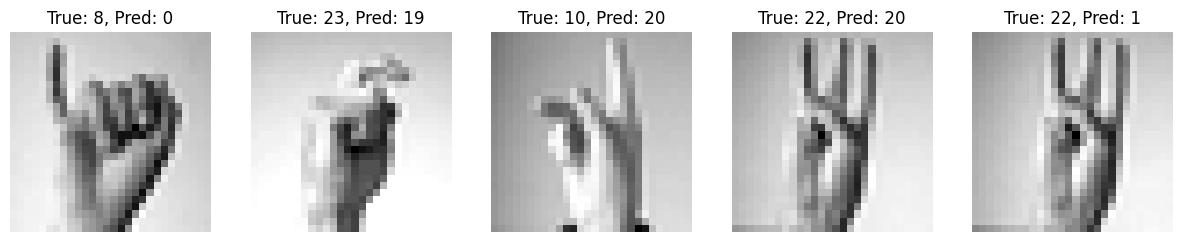

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

asl_misclassified_indices = np.where(asl_targets_test != asl_y_pred)[0]
asl_correct_class = asl_targets_test[asl_misclassified_indices]
asl_misclassified_class = asl_y_pred[asl_misclassified_indices]
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, ax in enumerate(axes):
    if i < len(asl_misclassified_indices):
        asl_misclassified_index = asl_misclassified_indices[i]
        ax.imshow(asl_data_test[asl_misclassified_index].reshape(28, 28), cmap='gray')
        ax.set_title(f'True: {asl_correct_class[i]}, Pred: {asl_misclassified_class[i]}')
        ax.axis('off')
plt.show()


## ISL Dataset

In [ ]:
import pandas as pd
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
        

In [ ]:

def process_image(file_path, image_size=(64, 64)):
    image = imread(file_path)
    image_resized = resize(image, image_size, anti_aliasing=True)
    return image_resized.flatten()
        

In [ ]:
train_data_path = 'data/train_classes.csv'
train_df = pd.read_csv(train_data_path)

train_features = np.array([process_image(f'data/train/{fname}') for fname in train_df['filename']])
train_labels = train_df.drop(columns=['filename']).values
        

In [ ]:
train_features_scaled = minmax_scale(train_features)

knn_classifier = KNeighborsClassifier(n_neighbors=5,p=2)
knn_classifier.fit(train_features_scaled, train_labels)

KNeighborsClassifier()

In [ ]:
valid_data_path = 'data/valid_classes.csv'
valid_df = pd.read_csv(valid_data_path)
valid_features = np.array([process_image(f'data/valid/{fname}') for fname in valid_df['filename']])
valid_labels = valid_df.drop(columns=['filename']).values
valid_features_scaled = minmax_scale(valid_features)

valid_predictions = knn_classifier.predict(valid_features_scaled)

In [ ]:

accuracy = accuracy_score(valid_labels, valid_predictions)
precision, recall, fscore, _ = precision_recall_fscore_support(valid_labels, valid_predictions, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {fscore}')
        

Accuracy: 0.9716840536512668
Precision: 0.9802706957432126
Recall: 0.9726231956197113
F1 Score: 0.9759084005800793


In [ ]:
test_data_path = 'data/test_classes.csv'
test_df = pd.read_csv(test_data_path)
test_features = np.array([process_image(f'data/test/{fname}') for fname in test_df['filename']])
test_labels = test_df.drop(columns=['filename']).values
test_features_scaled = minmax_scale(test_features)

test_predictions = knn_classifier.predict(test_features_scaled)

In [ ]:
accuracy = accuracy_score(test_labels, test_predictions)
precision, recall, fscore, _ = precision_recall_fscore_support(test_labels, test_predictions, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {fscore}')
        

Accuracy: 0.969727047146402
Precision: 0.9780174902342278
Recall: 0.9706759443339961
F1 Score: 0.97391820138742


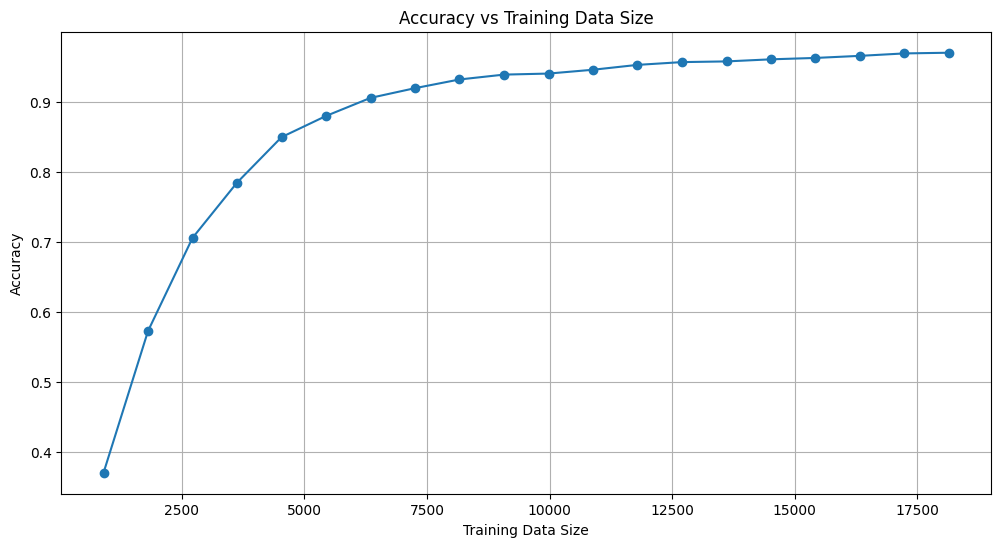

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def calculate_accuracy_vs_datasize(data_train_scaled, targets_train, data_test_scaled, targets_test, step_size=0.05):
    accuracies = []
    training_sizes = []

    for size in np.arange(step_size, 1 + step_size, step_size):
        subset_size = int(size * len(data_train_scaled))
        training_sizes.append(subset_size)
        subset_data = data_train_scaled[:subset_size]
        subset_targets = targets_train[:subset_size]
        knn_classifier = KNeighborsClassifier(n_neighbors=5, p=2)
        knn_classifier.fit(subset_data, subset_targets)
        y_pred = knn_classifier.predict(data_test_scaled)
        accuracy = accuracy_score(targets_test, y_pred)
        accuracies.append(accuracy)

    return training_sizes, accuracies

training_sizes, accuracies = calculate_accuracy_vs_datasize(
    train_features_scaled, train_labels, test_features_scaled, test_labels
)

plt.figure(figsize=(12, 6))
plt.plot(training_sizes, accuracies, marker='o')
plt.title('ISL Dataset -- Accuracy vs Training Data Size')
plt.xlabel('Training Data Size')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


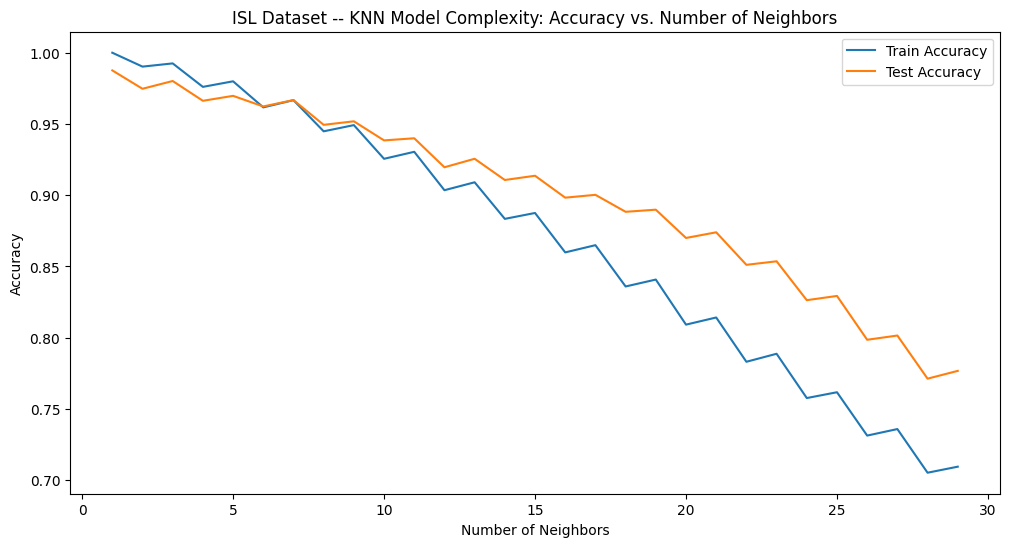

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

neighbors = range(1, 30)
train_accuracy = []
test_accuracy = []

for n in neighbors:
    knn_complexity = KNeighborsClassifier(n_neighbors=n)
    knn_complexity.fit(train_features_scaled, train_labels)
    train_accuracy.append(knn_complexity.score(train_features_scaled , train_labels))
    test_accuracy.append(knn_complexity.score(test_features_scaled, test_labels))

plt.figure(figsize=(12, 6))
plt.plot(neighbors, train_accuracy, label='Train Accuracy')
plt.plot(neighbors, test_accuracy, label='Test Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('ISL Dataset -- KNN Model Complexity: Accuracy vs. Number of Neighbors')
plt.legend()
plt.show()


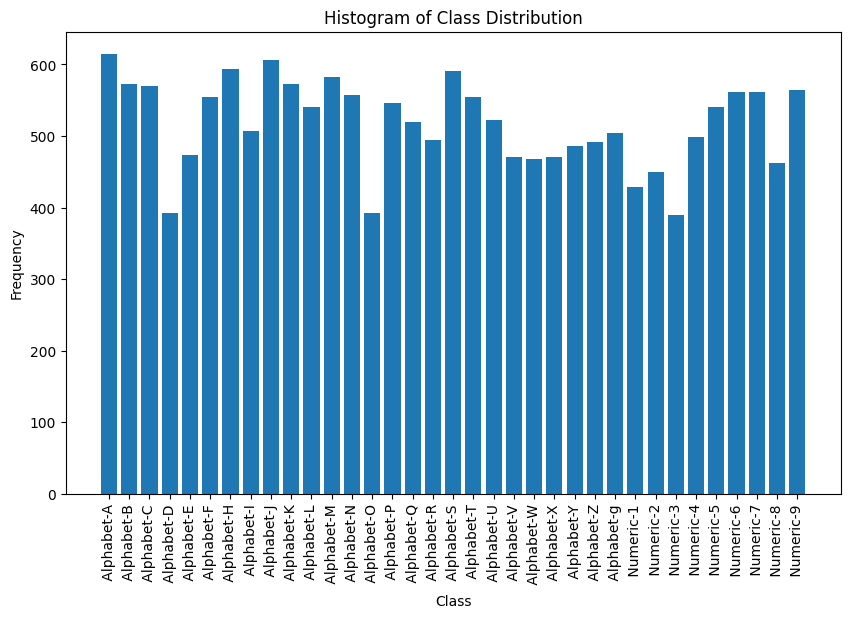

In [25]:
import matplotlib.pyplot as plt

class_distribution = train_df.drop(columns=['filename']).sum()

plt.figure(figsize=(10, 6))
plt.bar(class_distribution.index, class_distribution.values)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Histogram of Class Distribution')
plt.xticks(rotation=90)
plt.show()


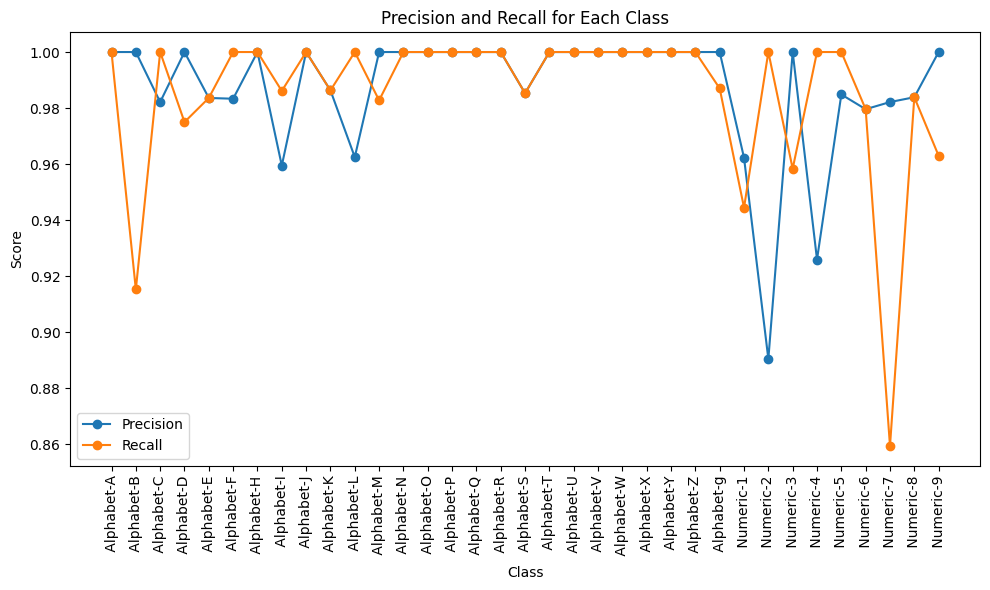

In [32]:
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt

precision, recall, _, _ = precision_recall_fscore_support(valid_labels, valid_predictions, average=None)

metrics_df = pd.DataFrame({'Precision': precision, 'Recall': recall}, index=class_distribution.index)

fig, ax = plt.subplots(figsize=(10, 6))

metrics_df['Precision'].plot(kind='line', ax=ax, label='Precision',marker='o')
metrics_df['Recall'].plot(kind='line', ax=ax, label='Recall',marker='o')

plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Precision and Recall for Each Class')

plt.xticks(np.arange(len(metrics_df.index)), metrics_df.index, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()
